Este conjunto de datos contiene la ocurrencia de incendios forestales registrada por el Ministerio de Medio Ambiente y Recursos Naturales (MMARN) en el año 2021, en el que se puede encontrar el registro de los incendios ocurridos en el territorio nacional (Lugar de origen, fecha de origen, fecha de extinción, causa, superficie afectada en hectáreas).

<h2>Librerias</h2>

In [1]:
import numpy as np # Algebra Linear
import pandas as pd # Procesamiento de Data, Archivo CSV I/O (ej. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math

<h2>Lectura del Archivo CSV</h2>

In [2]:
df_data = pd.read_excel(r"C:\\Users\\Manuel Brito\\Documents\\Python\\Dominican Republic\\Datos Abiertos\\Incendios-Forestales-2021.xlsx")
df_data.head()

,no.,Municipio,Provincia,Mes de origen,Dia de origen,Mes de extincion,Dia extincion,Causas,Area Afectada en Tareas,Metros Cuadrados,Mes de origen .1,Fecha origen,Fecha Extincion,Fecha Mes
0,1,Pedernales,Pedernales,Enero,5,Enero,7,Desconocida,665,418152.0,1,01/05/2021,01/07/2021,Jan-2021
1,2,Pedro Santana,Elías Piña,Enero,13,Enero,13,Conuquismo,95,59736.0,1,01/13/2021,01/13/2021,Jan-2021
2,3,Constanza,La Vega,Enero,3,Enero,3,Desconocida,1,628.8,1,01/03/2021,01/03/2021,Jan-2021
3,4,SAJOMA,Santiago,Enero,16,Enero,16,Desconocida,45,28296.0,1,01/16/2021,01/16/2021,Jan-2021
4,5,La Vega,La Vega,Enero,15,Enero,15,Intencional,8,5030.4,1,01/15/2021,01/15/2021,Jan-2021


<h2>Contrucción del DataFrame</h2>

In [3]:
df = pd.DataFrame(df_data, columns=['Municipio', 'Provincia','Causas'])

df['Incendios'] = 1 #Se agrega un campo con valor 1 para la suma

df

,Municipio,Provincia,Causas,Incendios
0,Pedernales,Pedernales,Desconocida,1
1,Pedro Santana,Elías Piña,Conuquismo,1
2,Constanza,La Vega,Desconocida,1
3,SAJOMA,Santiago,Desconocida,1
4,La Vega,La Vega,Intencional,1
...,...,...,...,...
245,Restauracion,Dajabon,Quema de Basura,1
246,Moncion,Stgo. Rguez.,Desconocida,1
247,Sabaneta,Stgo. Rguez.,Desconocida,1
248,Moncion,Stgo. Rguez.,Desconocida,1


<h2>Analisis de Provincias</h2>

In [4]:
provincia = df.groupby('Provincia').size().reset_index(name='Cantidad de incedios')

provincia

,Provincia,Cantidad de incedios
0,Azua,3
1,Dajabon,15
2,Elías Piña,181
3,Independencia,1
4,La Altagracia,1
5,La Vega,14
6,Mons. Nouel,2
7,Ocoa,2
8,Pedernales,8
9,San Cristobal,2


<h2>Graficica de Provincias afectadas por los incendios</h2>

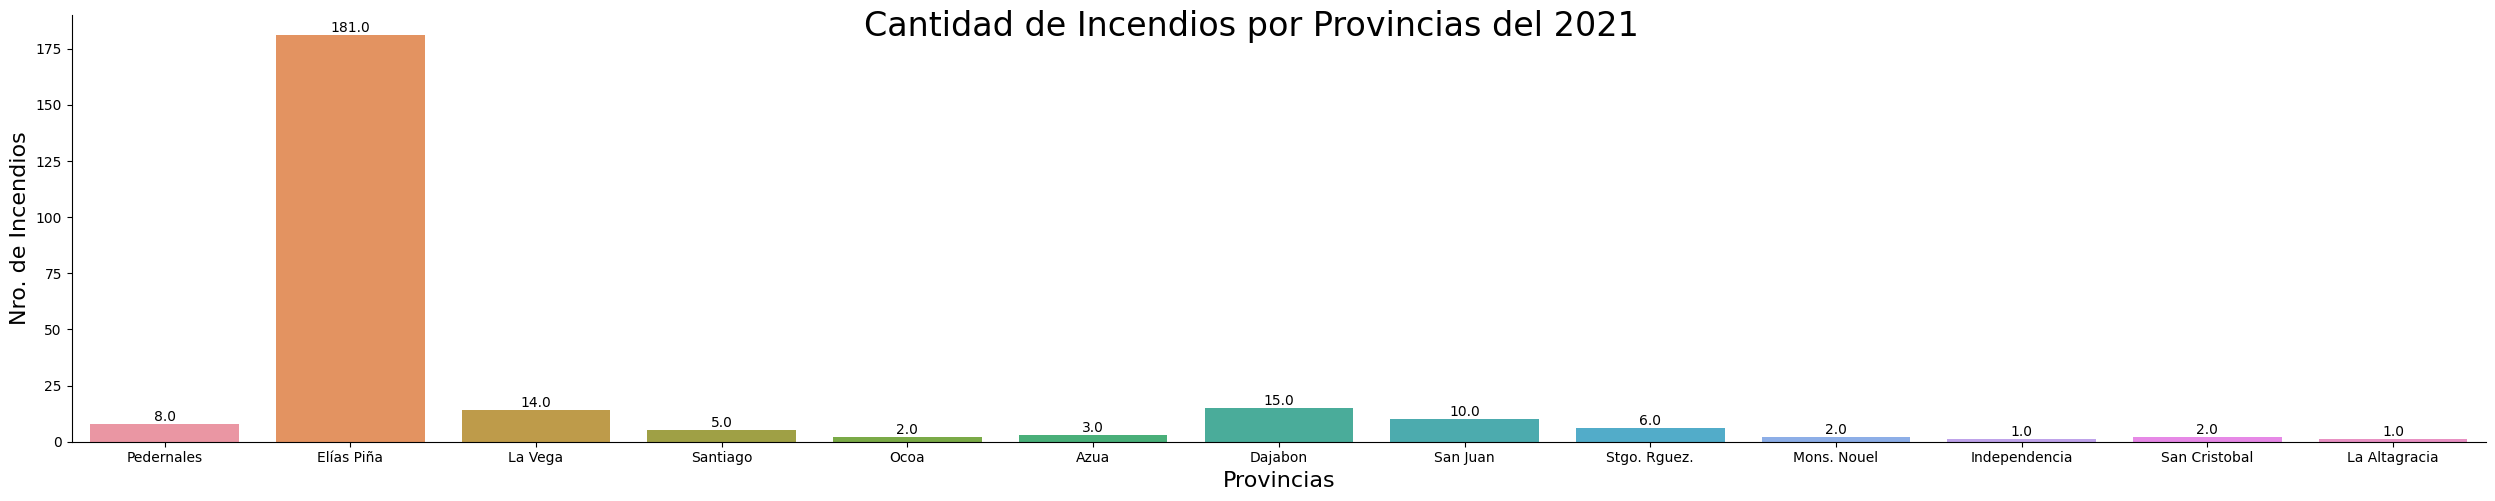

In [5]:
g = sns.catplot(x='Provincia', y='Incendios', kind='bar',data=df[['Provincia','Incendios']], aspect=5, estimator=sum)
g.fig.suptitle("Cantidad de Incendios por Provincias del 2021", size=24)
g.set_axis_labels("Provincias", "Nro. de Incendios", size=16)
#plt.subplots_adjust(top=.9)
# extraiga los objetos matplotlib axes_subplot de FacetGrid
ax = g.facet_axis(0, 0)

# iterar a través de los contenedores de ejes
for c in ax.containers:
    labels = [f'{(v.get_height() ):.1f}' for v in c]  #/ 1000 K
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

<h2>Analisis de Municipios</h2>

In [6]:
municipio = df.groupby('Municipio').size().reset_index(name='Cantidad de incedios')

municipio

,Municipio,Cantidad de incedios
0,Azua,1
1,Banica,1
2,Barahona,1
3,Bonao,11
4,Comendador,1
5,Constanza,25
6,Dajabon,9
7,Descubierta,1
8,Duverge,5
9,El Cercado,2


<h2>Graficica de Municipios afectados por los incendios</h2>

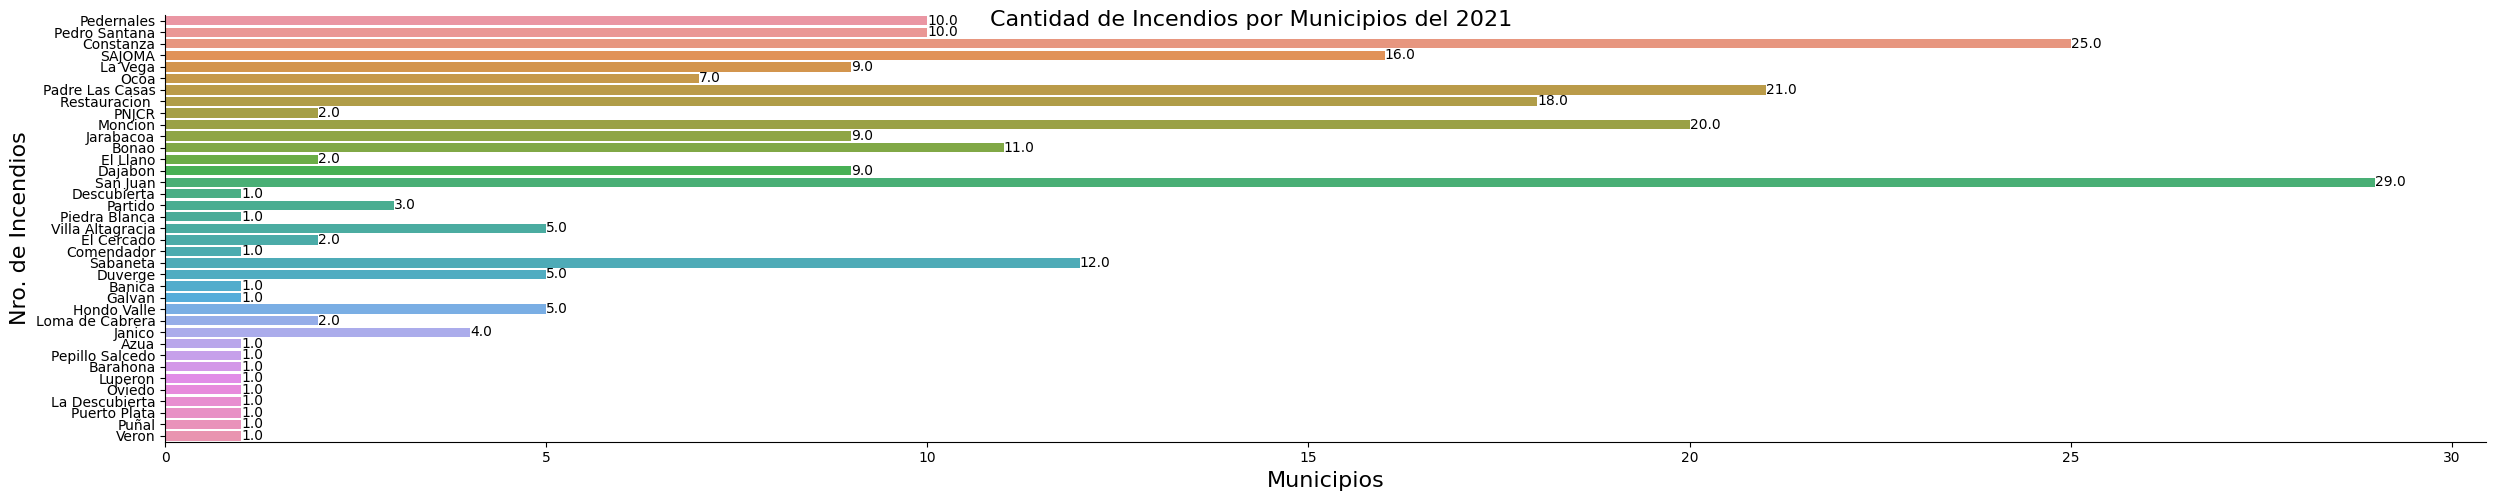

In [7]:
g = sns.catplot(x='Incendios', y='Municipio',  kind='bar',data=df[['Municipio','Incendios']], aspect=5, estimator=sum)
g.fig.suptitle("Cantidad de Incendios por Municipios del 2021", size=16)
g.set_axis_labels("Municipios", "Nro. de Incendios", size=16)
#plt.subplots_adjust(top=.9)
# extraiga los objetos matplotlib axes_subplot de FacetGrid
ax = g.facet_axis(0, 0)

# iterar a través de los contenedores de ejes
for c in ax.containers:
    labels = [f'{(v.get_width () ):.1f}' for v in c]  #/ 1000 K
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

<h2>Analisis de Causas</h2>

In [8]:
causas = df.groupby('Causas').size().reset_index(name='Cantidad de incedios')

causas

,Causas,Cantidad de incedios
0,Caminantes,5
1,Carboneros,5
2,Colmeneros,3
3,Conuquismo,134
4,Descarga Electrica,8
5,Desconocida,35
6,Ganaderia,26
7,Huelguistas,1
8,Intencional,27
9,Invasores,1


<h2>Graficica de Causas de los incendios</h2>

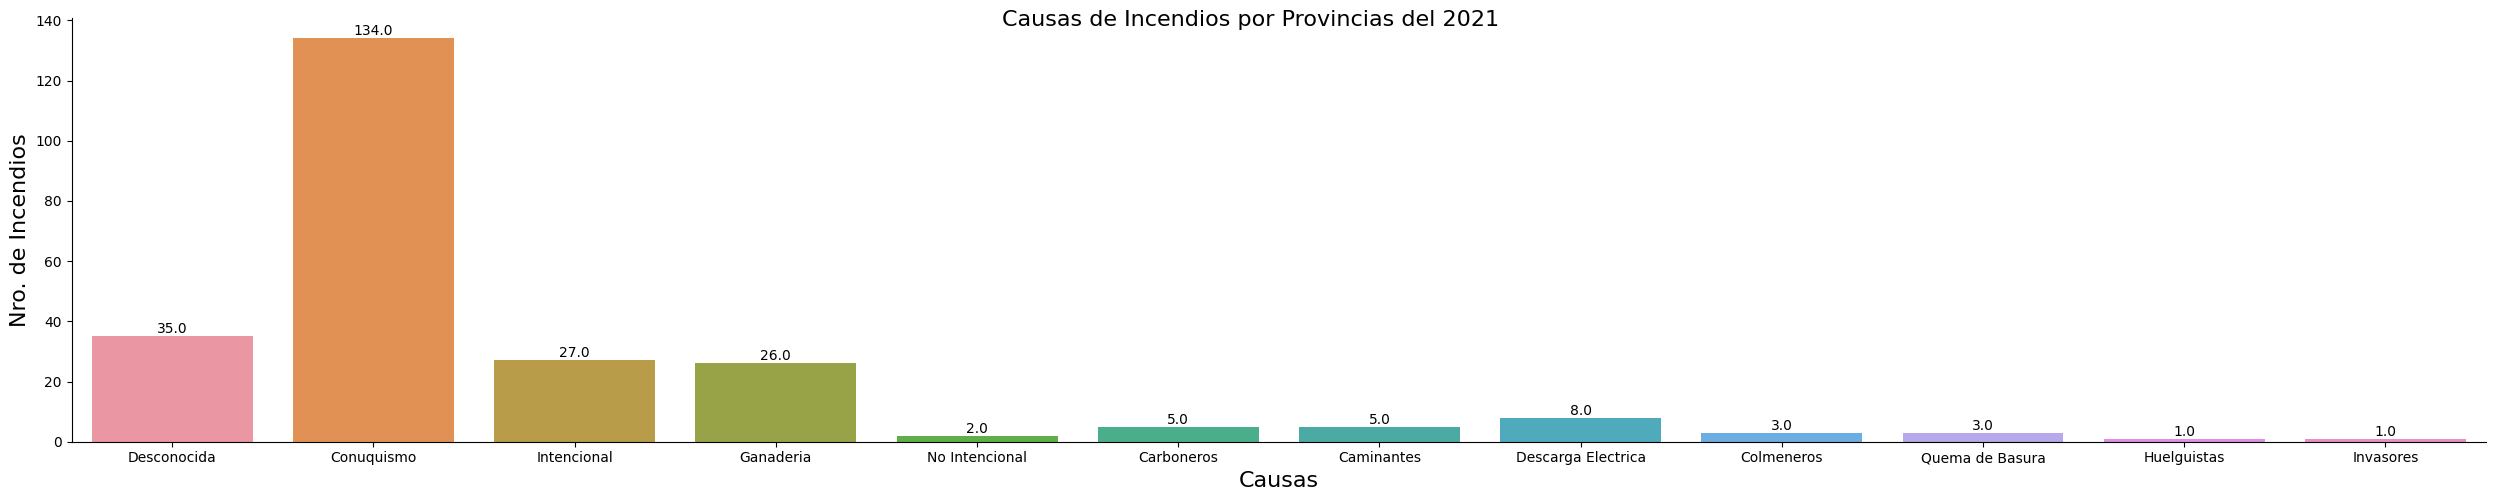

In [10]:
g = sns.catplot(x='Causas', y='Incendios', kind='bar',data=df[['Causas','Incendios']], aspect=5, estimator=sum)
g.fig.suptitle("Causas de Incendios por Provincias del 2021", size=16)
g.set_axis_labels("Causas", "Nro. de Incendios", size=16)
#plt.subplots_adjust(top=.9)
# extraiga los objetos matplotlib axes_subplot de FacetGrid
ax = g.facet_axis(0, 0)

# iterar a través de los contenedores de ejes
for c in ax.containers:
    labels = [f'{(v.get_height() ):.1f}' for v in c]  #/ 1000 K
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()